In [ ]:
import matplotlib.pyplot as plt
import numpy as np

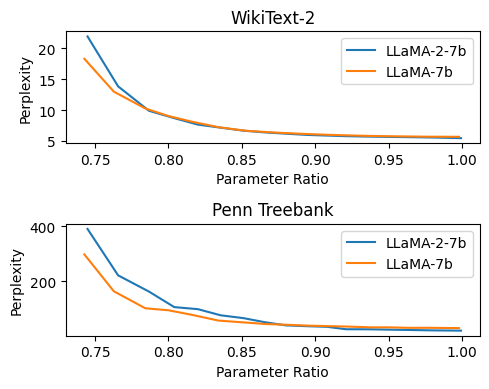

In [40]:
path="../output/facebook_opt-125m/enum_aTrue_s1_abs_mean_0.5.json"
path="../output/meta-llama_Llama-2-7b-hf/enum_aTrue_s1_abs_mean_0.5.json"
path="../output/meta-llama_Llama-2-7b-hf/enum_aTrue_s1_abs_mean_0.5_32_wikitext2.json"

fig, (ax,ax2) = plt.subplots(2,1, figsize=(5,4))

param_ratios=[]
wiki_ppls=[]
ptb_ppls=[]
with open(path, 'r') as f:
    for l in f.readlines():
        if l[0] == '{':
            r=eval(l)
            wiki_ppls.append(r['wikitext2'])
            ptb_ppls.append(r['ptb'])
        else:
            ratio=l.strip().split("=")[-1]
            param_ratios.append(float(ratio))
mask=np.array(param_ratios)>0.74
param_ratios=np.array(param_ratios)[mask]
wiki_ppls=np.array(wiki_ppls)[mask]
ptb_ppls=np.array(ptb_ppls)[mask]

ax.plot(param_ratios, wiki_ppls, label='LLaMA-2-7b')
ax2.plot(param_ratios, ptb_ppls, label='LLaMA-2-7b')


path="../output/huggyllama_llama-7b/enum_aTrue_s1_abs_mean_0.5.json"
path="../output/huggyllama_llama-7b/enum_aTrue_s1_abs_mean_0.5_16_ptb.json"
path="../output/huggyllama_llama-7b/enum_aTrue_s1_abs_mean_0.5_32_wikitext2.json"
param_ratios=[]
wiki_ppls=[]
ptb_ppls=[]
with open(path, 'r') as f:
    for l in f.readlines():
        if l[0] == '{':
            r=eval(l)
            wiki_ppls.append(r['wikitext2'])
            ptb_ppls.append(r['ptb'])
        else:
            ratio=l.strip().split("=")[-1]
            param_ratios.append(float(ratio))
mask=np.array(param_ratios)>0.74
param_ratios=np.array(param_ratios)[mask]
wiki_ppls=np.array(wiki_ppls)[mask]
ptb_ppls=np.array(ptb_ppls)[mask]

ax.plot(param_ratios, wiki_ppls, label='LLaMA-7b')
ax2.plot(param_ratios, ptb_ppls, label='LLaMA-7b')

ax.set_xlabel('Parameter Ratio')
ax.set_ylabel('Perplexity')
ax.legend()
ax.title.set_text('WikiText-2')
ax2.set_xlabel('Parameter Ratio')
ax2.set_ylabel('Perplexity')
ax2.legend()
ax2.title.set_text('Penn Treebank')

plt.tight_layout()
plt.savefig('../plots/ppl_plot.pdf', bbox_inches='tight')

# plt.show()
